In [131]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import datetime

In [132]:
df_GDP=pd.read_csv('GDP.csv')
df_M1US=pd.read_csv('M1US.csv')
df_M1V=pd.read_csv('M1V.csv')
df_M2US=pd.read_csv('M2US.csv')
df_M2V=pd.read_csv('M2V.csv')
df_M3US=pd.read_csv('M3US.csv')

def to_datetime(df):
    df.DATE=pd.to_datetime(df.DATE)
    return df

df_GDP=to_datetime(df_GDP)
df_M1US=to_datetime(df_M1US)
df_M1V=to_datetime(df_M1V)
df_M2US=to_datetime(df_M2US)
df_M2V=to_datetime(df_M2V)
df_M3US=to_datetime(df_M3US)
df_dicts={
          "df_GDP":df_GDP,
          "df_M1US":df_M1US,
          "df_M1V":df_M1V,
          "df_M2US":df_M2US,
          "df_M2V":df_M2V,
          "df_M3US":df_M3US,
          }




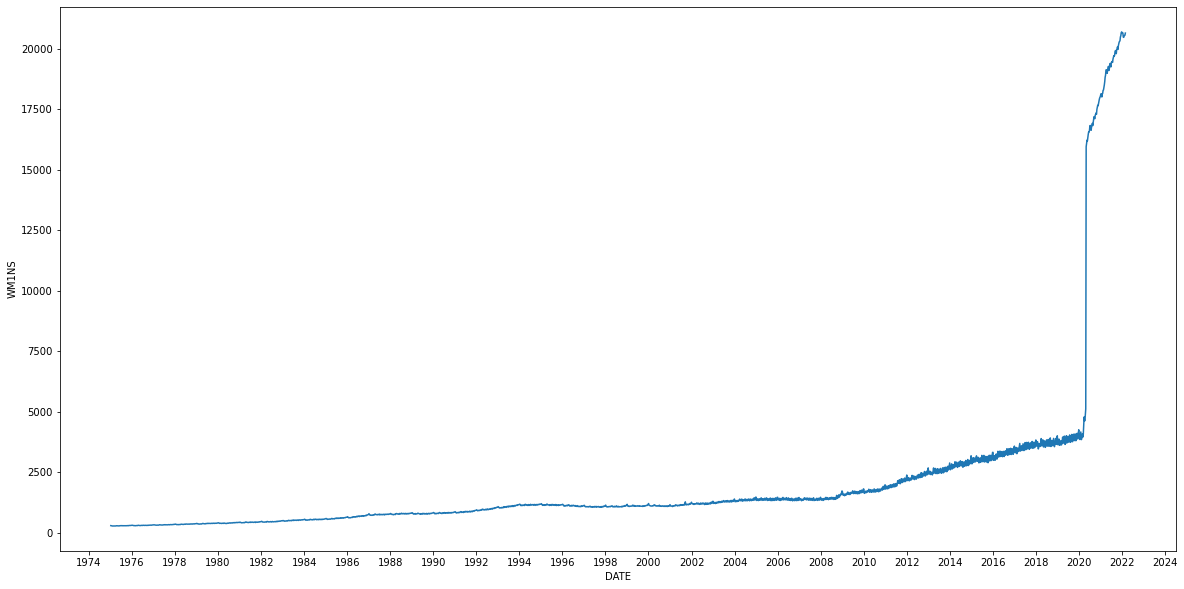

In [133]:
a=plt.figure(figsize=(20,10))
a=sns.lineplot(df_M1US.DATE,df_M1US.WM1NS)
a.xaxis.set_major_locator(mdates.YearLocator(base=2))
a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.show()

In [134]:
type(df_GDP.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [135]:
def filler(date_col,entity_col,entity):
    i=0
    date_col=date_col.to_list()
    entity_col=entity_col.to_list()

    for i in tqdm(range(0,len(date_col))):
        days_diff=date_col[i+1]-date_col[i]
        days_delta=days_diff.days
        value_delta=entity_col[i+1]-entity_col[i]
        value_delta_time=value_delta/days_delta
        for j in list(range(days_delta+1)):
            date_col.append(date_col[i]+datetime.timedelta(days=j))
            entity_col.append(entity_col[i]+j*value_delta_time)
    date_col1=pd.Series(date_col)
    entity_col1=pd.Series(entity_col)
    df=pd.concat([date_col1, entity_col1], axis=1)
    df=df.sort_values(by=0)
    df.reset_index(inplace=True,drop=True)
    entity=entity.replace('df_','')
    df.columns = ['date', entity]
    return df

df_dict={}
for key, value in df_dicts.items():
    df=df_dicts[key]
    df_dict[key]=filler(df[df.columns[0]],df[df.columns[1]],key)






100%|██████████| 745/745 [00:00<00:00, 4394.74it/s]


In [138]:
for key, value in df_dict.items():
    if key=='df_GDP':
        big_df=df_dict[key]
        #big_df.set_index('date',inplace=True)
    else:
        dfs=df_dict[key]
        #dfs.set_index(dfs.columns[0],inplace=True)
        big_df=pd.merge(big_df, dfs, on="date")
big_df.drop_duplicates(subset=['date'],inplace=True)
big_df

,date,GDP,M1US,M1V,M2US,M2V,M3US
0,1980-11-03,3035.289793,412.600000,7.377293,1595.200000,1.893370,1.596067e+12
6,1980-11-04,3036.796848,413.414286,7.379848,1596.057143,1.893957,1.596200e+12
7,1980-11-05,3038.303902,414.228571,7.382402,1596.914286,1.894543,1.596333e+12
8,1980-11-06,3039.810957,415.042857,7.384957,1597.771429,1.895130,1.596467e+12
9,1980-11-07,3041.318011,415.857143,7.387511,1598.628571,1.895717,1.596600e+12
...,...,...,...,...,...,...,...
61173,2021-09-27,23968.011913,19789.400000,1.184652,20925.300000,1.121565,2.114316e+13
61182,2021-09-28,23976.712685,19814.228571,1.184739,20950.028571,1.121674,2.114827e+13
61183,2021-09-29,23985.413457,19839.057143,1.184826,20974.757143,1.121783,2.115338e+13
61184,2021-09-30,23994.114228,19863.885714,1.184913,20999.485714,1.121891,2.115849e+13


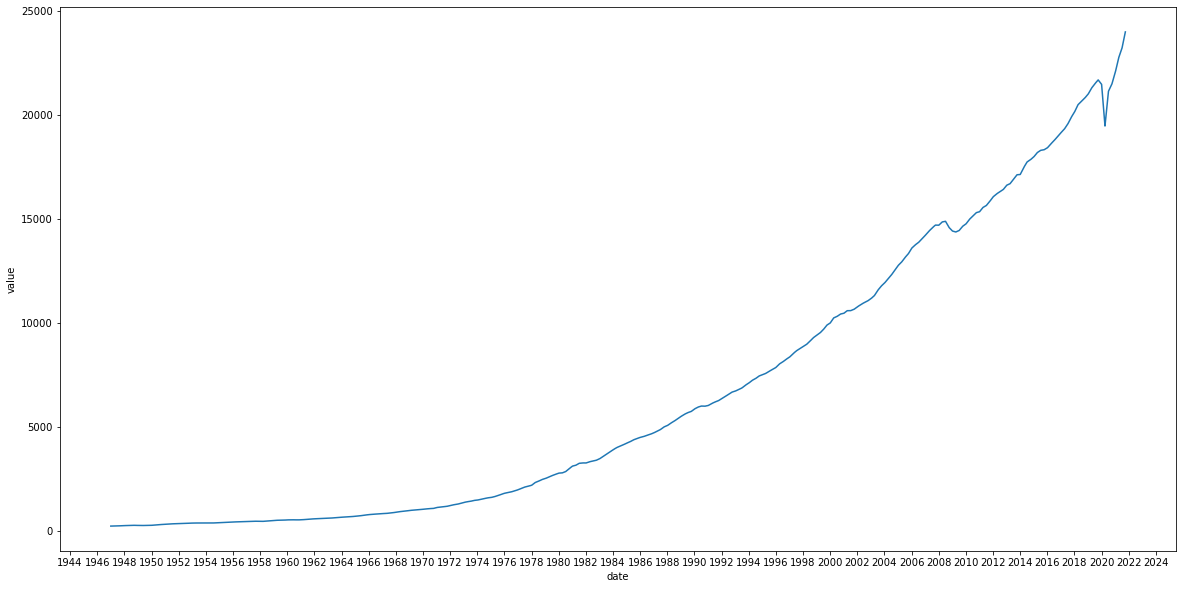

In [137]:
a = plt.figure(figsize=(20, 10))
a = sns.lineplot(df_GDP1['date'], df_GDP1['value'])
a.xaxis.set_major_locator(mdates.YearLocator(base=2))
a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()